In [1]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy
from tqdm.notebook import tqdm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
import pickle
from sklearn.metrics import accuracy_score, auc
import seaborn as sns



In [2]:
#function: 
def LorR(stand):
    if stand == 'R':
        return 0
    else: return 1
    
def pitch_type(pitch):
    #fastballs
    if pitch in ['FF', 'FC' , "FT" ,'FA' , 'SI' ,'SF']:
        return 0

    #changeups
    elif pitch in ["FS" ,'CH', 'KC']:
        return 1
    #curveballs
    elif pitch in ['CB' , "CU" , "KN"]:
        return 2
    
    #sliders
    elif pitch == 'SL': 
        return 3
    else: 
        return None
    
def isFastBall(pitch):
    #fastballs
    if pitch in ['FF', 'FC' , "FT" ,'FA' , 'SI' ,'SF']:
        return 0
    else:
        return 1
    
def on_3b(b):
    if pd.isna(b):
        return 0
    else:
        return b
def count(balls,strikes):
    return "{ball}-{strike}".format(ball = balls, strike= strikes)
def cat_count(count):
    if count =='0-0':
        return 0
    elif count == '0-1':
        return 1
    elif count == '0-2':
        return 2
    elif count =='1-0':
        return 3
    elif count == '1-1':
        return 4
    elif count == '1-2':
        return 5
    elif count == '2-0':
        return 6
    elif count == '2-1':
        return 7
    elif count =='2-2':
        return 8
    elif count == '3-0':
        return 9
    elif count == '3-1':
        return 10
    elif count == '3-2':
        return 11

In [3]:
DF = pd.read_csv("/SABR/20152023pitches.csv", verbose = 3)

Tokenization took: 28.48 ms
Type conversion took: 22.00 ms
Parser memory cleanup took: 0.03 ms
Tokenization took: 21.86 ms
Type conversion took: 19.48 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 17.04 ms
Type conversion took: 19.11 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 16.64 ms
Type conversion took: 16.82 ms
Parser memory cleanup took: 0.02 ms
Tokenization took: 16.74 ms
Type conversion took: 18.14 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 15.18 ms
Type conversion took: 19.80 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 14.19 ms
Type conversion took: 20.48 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 17.95 ms
Type conversion took: 19.54 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 14.71 ms
Type conversion took: 20.22 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 13.35 ms
Type conversion took: 19.52 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 13.48 ms
Type conversion took: 

Tokenization took: 14.05 ms
Type conversion took: 18.23 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 14.13 ms
Type conversion took: 16.60 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 12.62 ms
Type conversion took: 16.46 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 17.04 ms
Type conversion took: 17.45 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 13.86 ms
Type conversion took: 18.33 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 12.64 ms
Type conversion took: 18.64 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 14.17 ms
Type conversion took: 20.22 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 15.33 ms
Type conversion took: 19.73 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 15.14 ms
Type conversion took: 19.60 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 18.58 ms
Type conversion took: 19.84 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 10.95 ms
Type conversion took: 

Type conversion took: 18.66 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 17.84 ms
Type conversion took: 22.86 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 14.16 ms
Type conversion took: 19.86 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 15.17 ms
Type conversion took: 19.12 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 14.78 ms
Type conversion took: 19.59 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 17.96 ms
Type conversion took: 17.51 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 14.26 ms
Type conversion took: 17.61 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 14.49 ms
Type conversion took: 18.73 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 13.47 ms
Type conversion took: 19.58 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 16.69 ms
Type conversion took: 18.72 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 14.39 ms
Type conversion took: 19.34 ms
Parser memory clean

Tokenization took: 12.32 ms
Type conversion took: 18.20 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 16.88 ms
Type conversion took: 19.54 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 13.05 ms
Type conversion took: 16.86 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 14.28 ms
Type conversion took: 17.43 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 14.61 ms
Type conversion took: 16.92 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 16.57 ms
Type conversion took: 18.50 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 14.14 ms
Type conversion took: 18.14 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 14.34 ms
Type conversion took: 17.11 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 13.96 ms
Type conversion took: 15.63 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 12.89 ms
Type conversion took: 17.19 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 17.13 ms
Type conversion took: 

Type conversion took: 16.37 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 15.25 ms
Type conversion took: 18.07 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 13.81 ms
Type conversion took: 16.65 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 12.73 ms
Type conversion took: 16.01 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 12.45 ms
Type conversion took: 16.26 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 12.75 ms
Type conversion took: 15.14 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 15.28 ms
Type conversion took: 17.14 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 13.71 ms
Type conversion took: 17.02 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 13.07 ms
Type conversion took: 16.94 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 13.68 ms
Type conversion took: 16.58 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 16.26 ms
Type conversion took: 16.13 ms
Parser memory clean

/var/folders/1v/6kfsg1sj1h94v2jtztzln6rh0000gn/T/ipykernel_13221/1568872183.py:1: DtypeWarning: Columns (1,44,79,88,89) have mixed types. Specify dtype option on import or set low_memory=False.
  DF = pd.read_csv("/Users/moksh/Desktop/SABR/20152023pitches.csv", verbose = 3)


In [4]:
df= copy.deepcopy(DF)

In [5]:
df.drop('Unnamed: 0', axis =1, inplace = True)

In [6]:
df.dropna(subset=['pitch_type'],inplace=True)

In [7]:
pitches = copy.deepcopy(df)

In [8]:
pitches = pitches.iloc[::-1]
df_shifted = pitches.shift(1).add_prefix('previous_')
result_df = pd.concat([pitches, df_shifted], axis=1 )
result_df.reset_index(inplace= True)
result_df.drop('index',axis = 1, inplace = True)


In [9]:
result = copy.deepcopy(result_df)

In [10]:
result = result[result['game_pk'] == result['previous_game_pk']]


In [11]:
training = copy.deepcopy(result)

In [12]:
training['fastball'] = training['pitch_type'].apply(isFastBall)
training['pitch_type'] = training['pitch_type'].apply(pitch_type)
training['previous_fastball'] = training['previous_pitch_type'].apply(isFastBall)
training['previous_pitch_type'] = training['previous_pitch_type'].apply(pitch_type)
training['count'] = training.apply(lambda x:count(x.balls,x.strikes),axis =1)
training['count'] = training['count'].apply(cat_count)

In [13]:
training['stand'] = training['stand'].apply(lambda x:LorR(x))

In [14]:
training_df= training[['pitch_type','pitcher','previous_pitch_type','pitch_number','count','stand','fastball','previous_fastball']]

In [15]:
training_df= training_df.dropna(subset=['count','previous_pitch_type'])

In [16]:
training_df = training_df.sample(frac = 1)
le = LabelEncoder()
le.fit(training_df['pitcher'])
training_df['pitcher'] = le.transform(training_df['pitcher'])

In [17]:
filename = '/SABR/pitcherencoder.sav'
pickle.dump(le, open(filename, 'wb'))


In [18]:
classes = le.classes_

In [19]:
training_df_back_up = copy.deepcopy(training_df)

              precision    recall  f1-score   support

           0       0.60      0.58      0.59     12829
           1       0.60      0.62      0.61     12902

    accuracy                           0.60     25731
   macro avg       0.60      0.60      0.60     25731
weighted avg       0.60      0.60      0.60     25731

[0.49858148 0.50141852]
[0.47852785 0.52147215]
0.6015877180052426


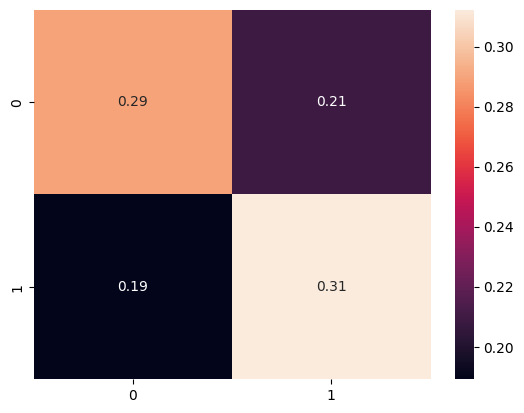

In [20]:
#Fastball Identification
fastball_training = training_df.groupby('fastball').head(min(list(training_df['fastball'].value_counts())))
X_train, X_test, y_train, y_test = train_test_split(np.asarray(fastball_training.drop(['pitch_type','fastball'],axis=1)),np.asarray(fastball_training['fastball']), test_size=0.01)
fb_dc = DecisionTreeClassifier()
fb_dc.fit(X_train, y_train)
fastball_preds = fb_dc.predict(X_test)
print(classification_report(y_test,fastball_preds))
sns.heatmap(confusion_matrix(y_test,fastball_preds)/len(y_test),annot=True)
plt.savefig('/Desktop/SABR/fb_confusion.png', dpi=380, bbox_inches='tight')

real_unique_values, real_counts = np.unique(y_test, return_counts=True)
print(real_counts/len(y_test))
pred_unique_values, pred_counts = np.unique(fastball_preds, return_counts=True)
print(pred_counts/len(fastball_preds))
print(roc_auc_score(y_test,fastball_preds))

In [21]:
roc = roc_curve(y_test,fastball_preds)

NameError: name 'lw' is not defined

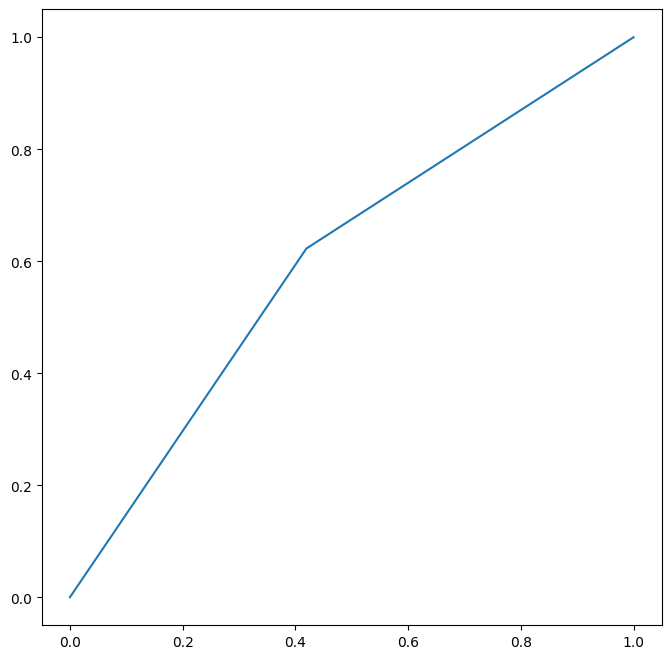

In [22]:
plt.figure(figsize=(8,8))
plt.plot(roc[0],roc[1], label = 'Decision Tree Model (area = '+str(round(roc_auc_score(y_test,fastball_preds),3)) + ")")
plt.plot([0, 1], [0, 1], 'k--', lw=lw, label = 'Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Fastball Model ROC curve')
plt.legend(loc="lower right")
plt.savefig('/SABR/fastballdecisionROC.png', dpi=380, bbox_inches='tight')
plt.show()



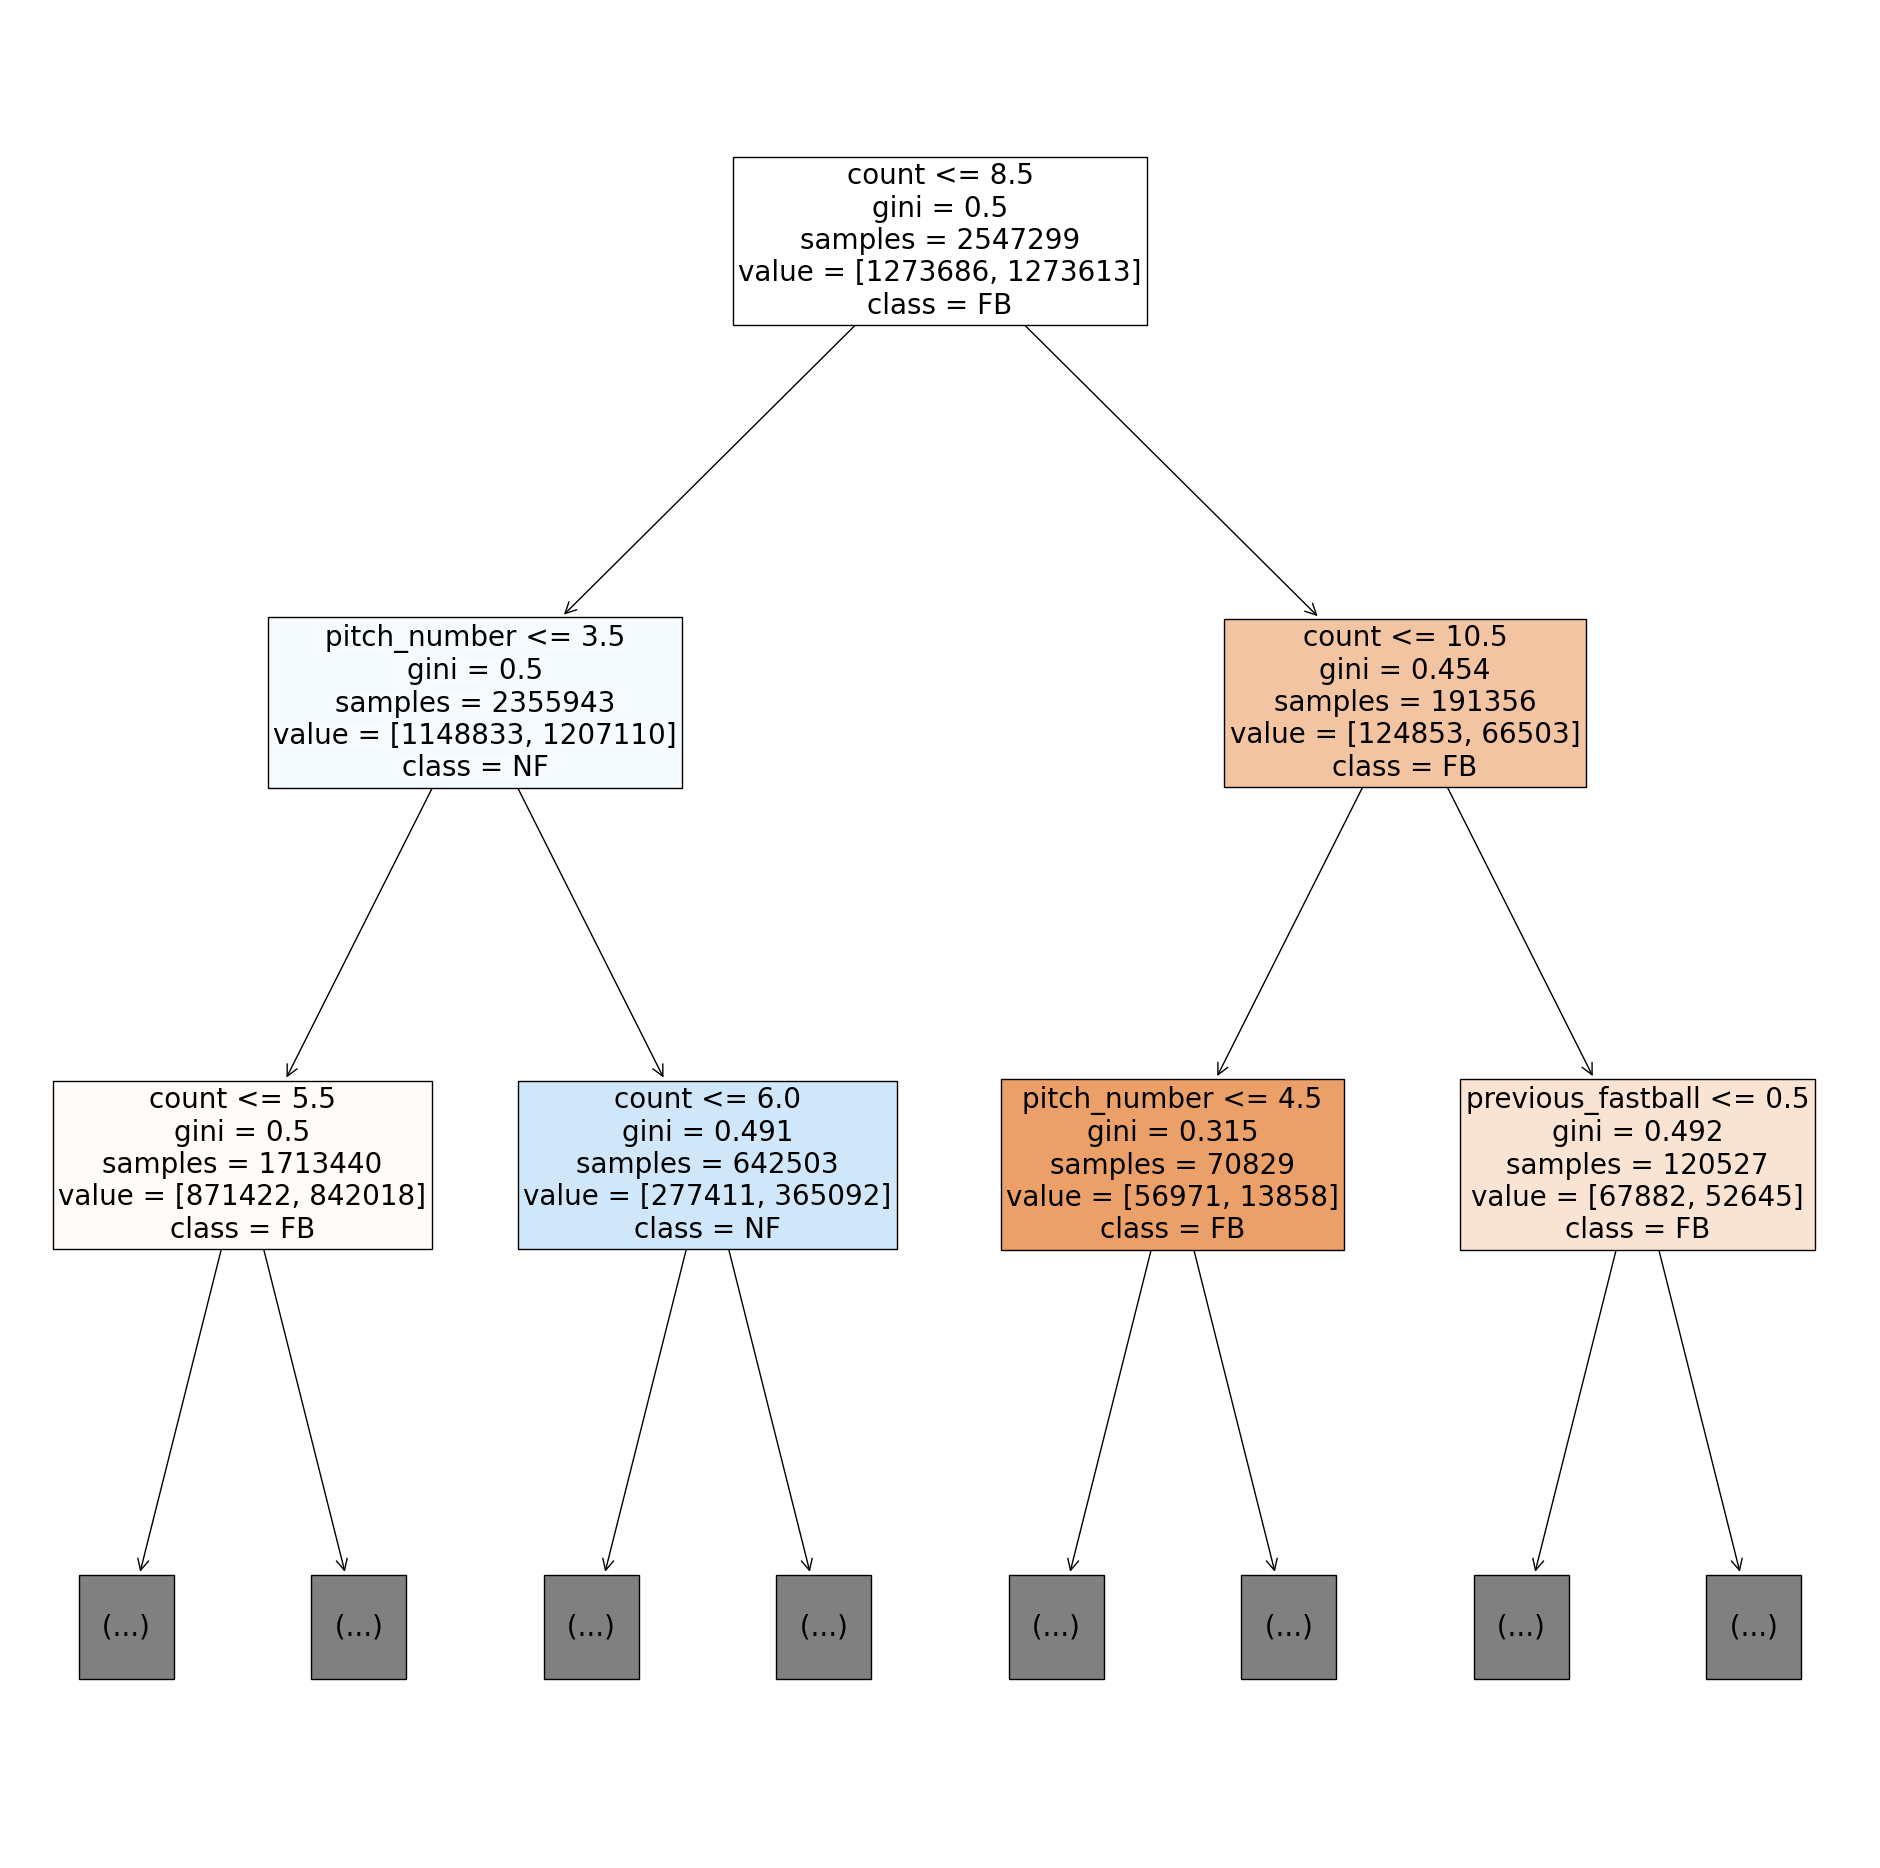

In [29]:
plt.figure(figsize=(24,24))

plot_tree(fb_dc, feature_names=fastball_training.drop(['pitch_type','fastball'],axis=1).columns, class_names=['FB','NF'], filled=True, max_depth = 2, fontsize = 20)
plt.savefig('/decision_tree_fb.png', dpi=380, bbox_inches='tight')



In [ ]:
filename = '/SABR/fastball_pitch_model.sav'
pickle.dump(fb_dc, open(filename, 'wb'))


In [24]:
#Non Fastball Identification

non_fastball_training = training_df[training_df['pitch_type']!= 0]
non_fastball_training = non_fastball_training.groupby('pitch_type').head(min(list(non_fastball_training['pitch_type'].value_counts())))
X_train, X_test, y_train, y_test = train_test_split(np.asarray(non_fastball_training.drop(['fastball','pitch_type'],axis=1)),np.asarray(non_fastball_training['pitch_type']), test_size=0.01)
nfb_dc = DecisionTreeClassifier()
nfb_dc.fit(X_train, y_train)
preds = nfb_dc.predict(X_test)
print(classification_report(y_test,preds))
print(confusion_matrix(y_test,preds))
real_unique_values, real_counts = np.unique(y_test, return_counts=True)
print(real_counts/len(y_test))
pred_unique_values, pred_counts = np.unique(preds, return_counts=True)
print(pred_counts/len(preds))
oe = OneHotEncoder()
y_test_roc =oe.fit_transform(y_test.reshape(-1, 1))
preds_roc = oe.transform(preds.reshape(-1, 1))
print(roc_auc_score(y_test_roc.toarray(),preds_roc.toarray(),multi_class='ovr'))


              precision    recall  f1-score   support

         1.0       0.69      0.61      0.65      2753
         2.0       0.66      0.74      0.70      2755
         3.0       0.69      0.69      0.69      2877

    accuracy                           0.68      8385
   macro avg       0.68      0.68      0.68      8385
weighted avg       0.68      0.68      0.68      8385

[[1683  589  481]
 [ 335 2028  392]
 [ 431  458 1988]]
[0.32832439 0.32856291 0.3431127 ]
[0.29206917 0.3667263  0.34120453]
0.759662254560122


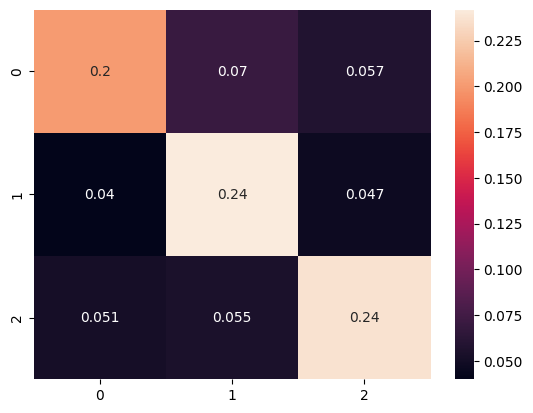

In [25]:
sns.heatmap((confusion_matrix(y_test,preds)/len(y_test)), annot=True)
plt.savefig('/SABR/non_fb_confusion.png', dpi=380, bbox_inches='tight')


In [ ]:
y_test_roc.toarra

In [ ]:
# Assuming y_true is a numpy array of true labels, and y_score is a numpy array of predicted scores
pitch_classes = ['CH',"CU",'SL']
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y_test))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc.toarray()[:, i], preds_roc.toarray()[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
lw = 2
colors = ['red', 'green', 'blue'] # specify colors for each class
plt.figure(figsize=(8,8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of pitch {0} (area = {1:0.2f})'
             ''.format(pitch_classes[i], roc_auc[i]))

# Plot settings

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Non-Fastball Model ROC curve')
plt.legend(loc="lower right")
plt.savefig('/SABR/non_fb_decision_roc.png', dpi=380, bbox_inches='tight')

plt.show()

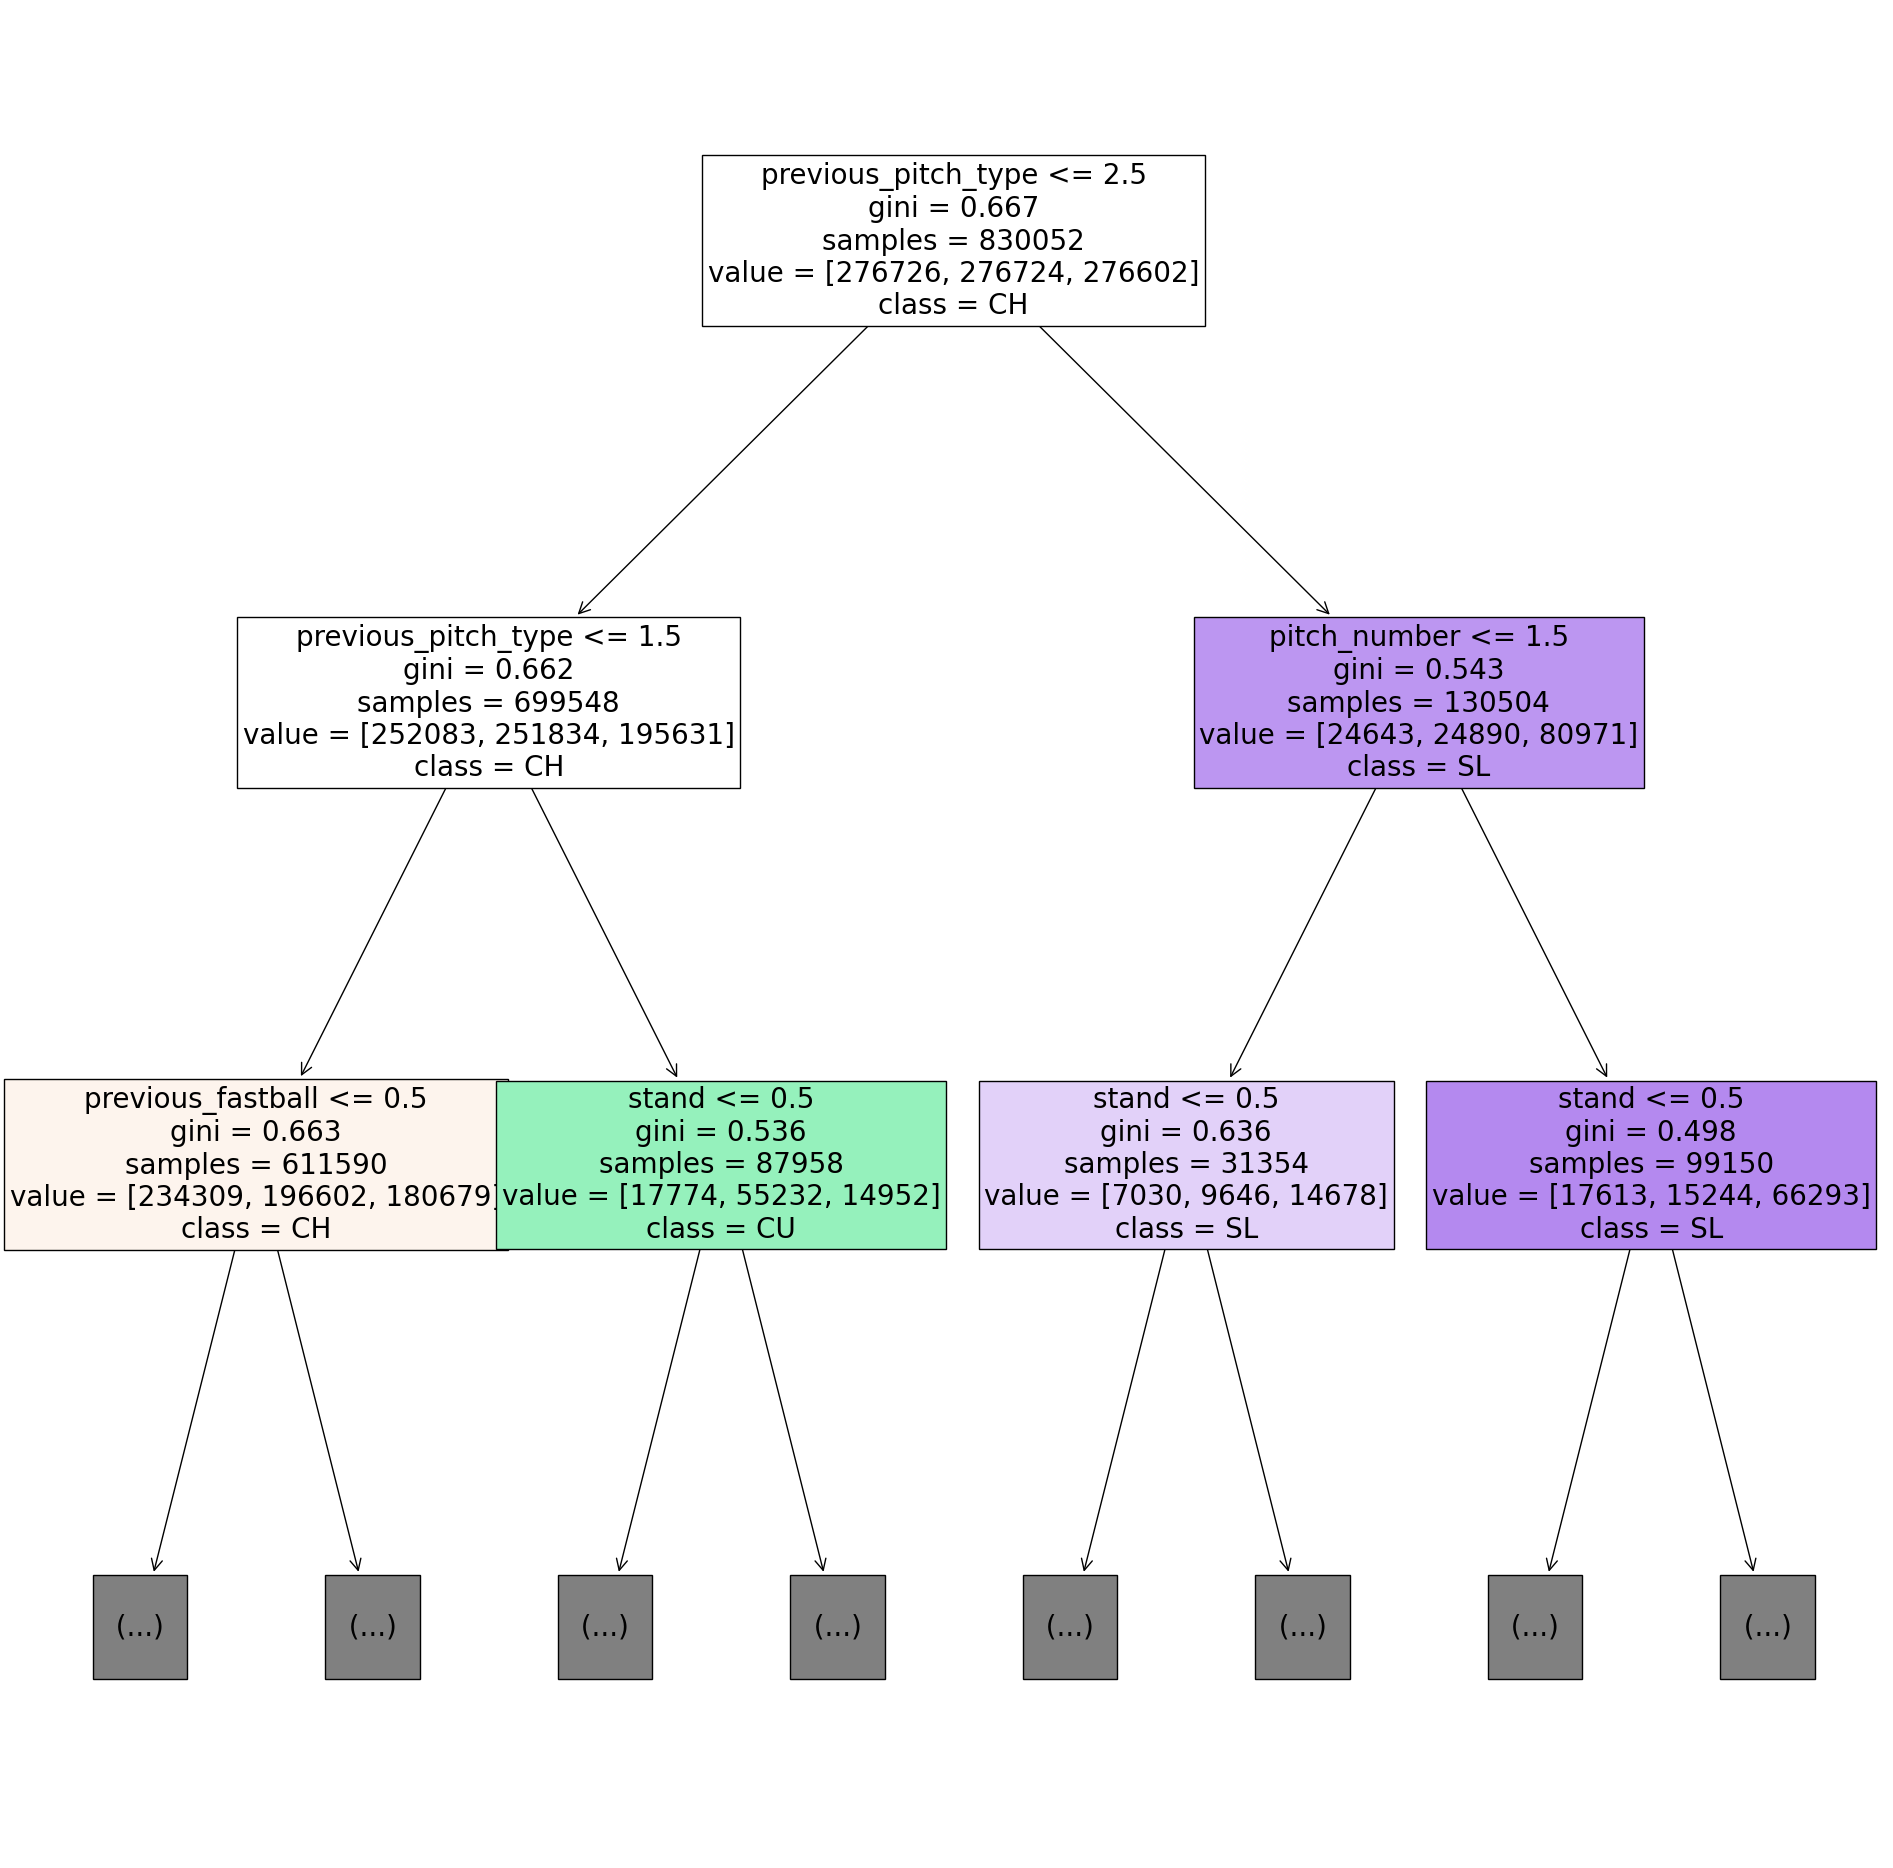

In [28]:
plt.figure(figsize=(24,24))

plot_tree(nfb_dc, feature_names=non_fastball_training.drop(['pitch_type','fastball'],axis=1).columns, class_names=['CH','CU','SL'], filled=True, max_depth = 2, fontsize=20,)
plt.savefig('/decision_tree_nfb.png', dpi=380, bbox_inches='tight')



In [ ]:
filename = 'SABR/nonfastball_pitch_model.sav'
pickle.dump(nfb_dc, open(filename, 'wb'))
